In [1]:
import tensorflow as tf
import pickle as pkl
import PIL
import PIL.Image

In [17]:
img_num = 100075
row = 1
col = 4

In [18]:
datapath = 'data/scratchwork/BSDS500/'
highpasspath = datapath + 'patches/train/' + 'highpass/' + str(img_num) + '.jpg.pckl_' + str(row) + '_' + str(col) + '.pckl'
lowpasspath = datapath + 'patches/train/' + 'lowpass/' + str(img_num) + '.jpg.pckl_' + str(row) + '_' + str(col) + '.pckl'
fid = open(highpasspath,'rb')
img_hp = pkl.load(fid)
fid.close()
fid = open(lowpasspath,'rb')
img_lp = pkl.load(fid)
fid.close
img_cmpr = img_hp + img_lp
wholepath = datapath + 'whole/train/' + str(img_num) +'.jpg.pckl'
fid = open(wholepath,'rb')
wholedata = pkl.load(fid)
fid.close()
low = wholedata['lowpass']
high = wholedata['highpass']
raw = wholedata['raw']
cmpr = low + high

In [19]:
high.shape

TensorShape([320, 480, 1])

In [20]:
img_hp = (img_hp - tf.reduce_min(img_hp))/(tf.reduce_max(img_hp) - tf.reduce_min(img_hp))
high = (high - tf.reduce_min(high))/(tf.reduce_max(high) - tf.reduce_min(high))
img_cmpr = tf.where(img_cmpr > 1.0,tf.cast(1.0,'float64'),img_cmpr)
img_cmpr = tf.where(img_cmpr < 0.0,tf.cast(0.0,dtype='float64'),img_cmpr)
cmpr = tf.where(cmpr > 1.0,tf.cast(1.0,'float64'),cmpr)
cmpr = tf.where(cmpr < 0.0,tf.cast(0.0,'float64'),cmpr)

In [21]:
img_hp = img_hp * tf.ones((1,1,3),dtype='float64')
img_lp = img_lp * tf.ones((1,1,3),dtype='float64')
img_cmpr = img_cmpr * tf.ones((1,1,3),dtype='float64')
low = low * tf.ones((1,1,3),dtype='float64')
high = high * tf.ones((1,1,3),dtype='float64')
cmpr = cmpr * tf.ones((1,1,3),dtype='float64')

In [22]:
import numpy as np
img_hp = np.array(img_hp)
img_lp = np.array(img_lp)
img_cmpr = np.array(img_cmpr)
low = np.array(low)
high = np.array(high)
cmpr = np.array(cmpr)
raw = np.array(raw)

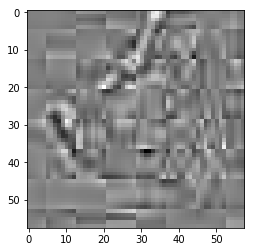

In [23]:
from matplotlib import pyplot as plt
plt.imshow(img_hp)
plt.show()

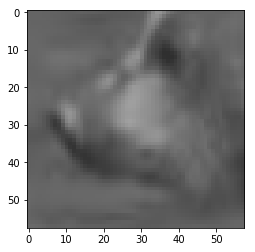

In [24]:
plt.imshow(img_lp)
plt.show()

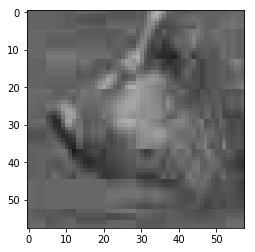

In [25]:
plt.imshow(img_cmpr)
plt.show()

In [26]:
tf.reduce_max(img_lp)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6296853587787156>

In [27]:
tf.reduce_min(img_lp)

<tf.Tensor: shape=(), dtype=float64, numpy=0.18442448213893017>

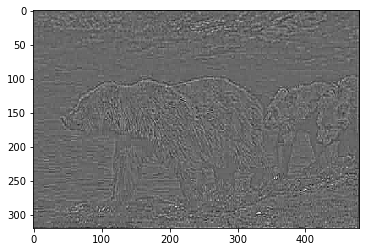

In [28]:
plt.imshow(high)
plt.show()

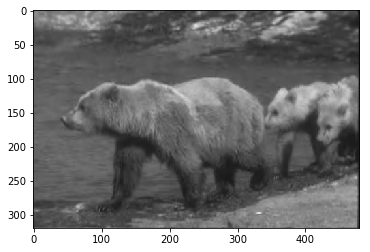

In [29]:
plt.imshow(low)
plt.show()

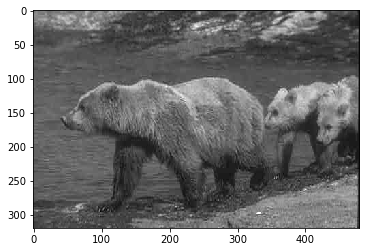

In [30]:
plt.imshow(cmpr)
plt.show()

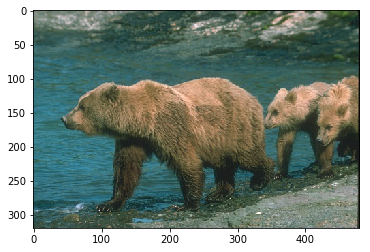

In [31]:
plt.imshow(raw)
plt.show()